In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
%matplotlib inline

%run ../sim_utilities.py

In [2]:
import bandits_lab.bandit_definitions as bands
import bandits_lab.algorithms as algs

In [3]:
%ls ../data_saves/kl_ucb/

klucb.pkl           klucb2_T=10000.pkl  klucb2_anytime.pkl  klucbT=1000.pkl
klucb2_T=100.pkl    klucb2_T=20000.pkl  klucbT=10.pkl       klucbT=10000.pkl
klucb2_T=1000.pkl   klucb2_T=500.pkl    klucbT=100.pkl


In [4]:
T = 10000
N_tests = [10]

In [5]:
def print_reg(data_dict):
    colors = plt.get_cmap("tab10").colors
    T = data_dict["T"]
    tslice = range(int(1e3), int(1e4))
    alg_list = data_dict["alg_list"]
    band_list = data_dict["band_list"]
    plt.figure(figsize=(9, 6))
    plt.title(f'$R_T \, /  \, \log \,  T$')
    for i, band in enumerate(band_list):
        for j, alg in enumerate(alg_list):
            mean_reg, var_reg = data_dict["results"][i][j]
            sig = np.sqrt(var_reg / data_dict["N_tests"][i])
            scaling =  1+ np.log(np.arange(1,T+2))
            plt.plot(tslice, 
                     (mean_reg / scaling)[tslice],
                     color=colors[j], 
                     label=alg.label
                    )
            plt.xscale("log")
            plt.fill_between(tslice, 
                             ((mean_reg - sig) /  scaling)[tslice], 
                             ((mean_reg + sig) / scaling) [tslice], 
                             color=colors[j], 
                             alpha=0.3)
        plt.legend()
        plt.show()

In [6]:
K_ber, mus_ber = 2, np.array([0.9, 0.8])
band_list = [bands.BernoulliBand(K_ber, mus_ber),]

K = K_ber

alg_list = [algs.KLUCBswitch(K, label="KLUCBswitch"),
            algs.KLUCB(K, label="KLUCB"),
            algs.UCB_a(K, label='UCB'),
            algs.KLUCBPlusPlus(K, label="KLUCB++"),
            algs.MOSS_a(K, sig=1/2, label="MOSS"),
            algs.Exp3(K, M=1, label="Exp3"),
            algs.FastFTRLTsallis(K, M=1, label=f"Tsallis-INF"),
           ]


data_dict_ber={
         'name':'Long Name',
         'short_name':'KLexp-ber',
         'T':T,
         'N_tests':N_tests,
         'band_list':band_list,
         'alg_list':alg_list,
         'results':None,
     }

launch(data_dict_ber, n_jobs=1, checkpoints=False)
print('Done')

KLUCBswitch took 3.91 total, i.e., 0.39 per run
KLUCB took 37.72 total, i.e., 3.77 per run
UCB took 2.30 total, i.e., 0.23 per run
KLUCB++ took 19.72 total, i.e., 1.97 per run
MOSS took 3.10 total, i.e., 0.31 per run
Exp3 took 12.01 total, i.e., 1.20 per run
Tsallis-INF took 34.16 total, i.e., 3.42 per run
Done


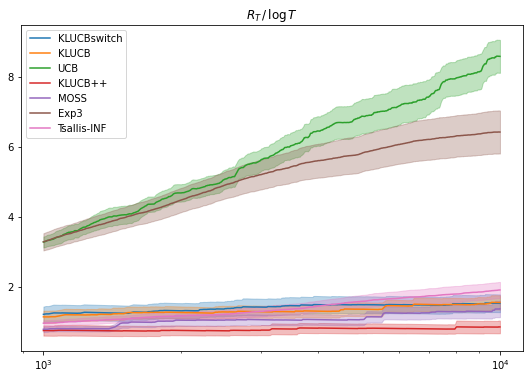

In [7]:
print_reg(data_dict_ber)

In [8]:
K_exp, mus_exp = 4,  np.array([0.15, 0.12, 0.10, 0.05])

band_list = [
        bands.TruncatedExp(K_exp, mus_exp),
        ]

band_list[0].mus = [0.14973914, 0.12, 0.10, 0.05]

K = K_exp
alg_list = [algs.KLUCBswitch(K, label="KLUCBswitch"),
            algs.KLUCB(K, label="KLUCB"),
            algs.UCB_a(K, label='UCB'),
            algs.KLUCBPlusPlus(K, label="KLUCB++"),
            algs.MOSS_a(K, sig=1/2, label="MOSS"),
            algs.Exp3(K, M=1, label="Exp3"),
            algs.FastFTRLTsallis(K, M=1, label="Tsallis-INF"),
           ]


data_dict_exp={
         'name':'Long Name',
         'short_name':'KLexp-exp',
         'T':T,
         'N_tests':N_tests,
         'band_list':band_list,
         'alg_list':alg_list,
         'results':None,
     }

launch(data_dict_exp, n_jobs=1, checkpoints=False)
print('Done')

KLUCBswitch took 5.16 total, i.e., 0.52 per run
KLUCB took 219.97 total, i.e., 22.00 per run
UCB took 2.67 total, i.e., 0.27 per run
KLUCB++ took 45.93 total, i.e., 4.59 per run
MOSS took 3.22 total, i.e., 0.32 per run
Exp3 took 12.13 total, i.e., 1.21 per run
Tsallis-INF took 44.82 total, i.e., 4.48 per run
Done


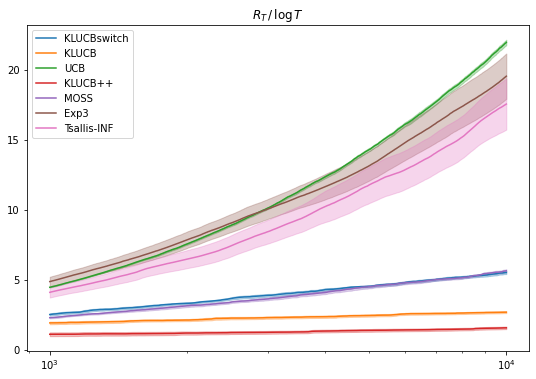

In [9]:
print_reg(data_dict_exp)

In [10]:
K_gauss, mus_gauss, sig_gauss = 4, np.array([0.7, 0.5, 0.3, 0.2 ]), np.array([0.1 for _ in range(4)])

band_list = [
        bands.TruncatedGaussian(K_gauss, mus_gauss, sig_gauss),
        ]
#band_list[0].mus = [0.69996814, 0.5, 0.30004376, 0.200]

K = K_gauss
alg_list = [algs.KLUCBswitch(K, label="KLUCBswitch"),
            algs.KLUCB(K, label="KLUCB"),
            algs.UCB_a(K, label='UCB'),
            algs.KLUCBPlusPlus(K, label="KLUCB++"),
            algs.MOSS_a(K, sig=1/2, label="MOSS"),
            algs.Exp3(K, M=1, label="Exp3"),
            algs.FastFTRLTsallis(K, M=1, label="Tsallis-INF"),
           ]

N_tests = [5]

data_dict_gauss={
         'name':'Long Name',
         'short_name':'KLExp-band',
         'T':T,
         'N_tests':N_tests,
         'band_list':band_list,
         'alg_list':alg_list,
         'results':None,
     }

launch(data_dict_gauss, n_jobs=1, checkpoints=False)
print('Done')

KLUCBswitch took 2.80 total, i.e., 0.56 per run
KLUCB took 109.59 total, i.e., 21.92 per run
UCB took 1.40 total, i.e., 0.28 per run
KLUCB++ took 18.61 total, i.e., 3.72 per run
MOSS took 1.70 total, i.e., 0.34 per run
Exp3 took 6.37 total, i.e., 1.27 per run
Tsallis-INF took 17.88 total, i.e., 3.58 per run
Done


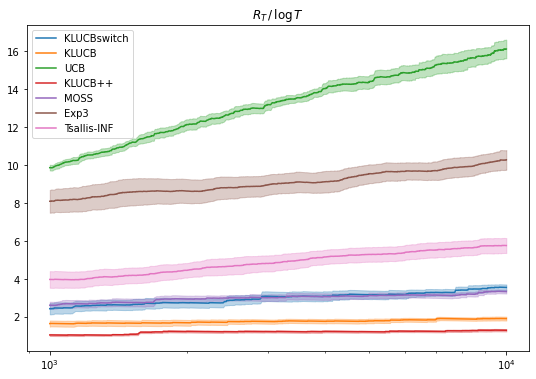

In [11]:
print_reg(data_dict_gauss)

In [12]:
#N = int(1e7)
#K = 4
#print(mus_gauss, sig_gauss)
#samples_gauss = np.zeros((K, N))
#for a in range(K):
#    for i in range(N):
#        samples_gauss[a, i] = max(
#            0, min(1, np.random.normal(mus_gauss[a], sig_gauss[a]))
#        )
#print(np.mean(samples_gauss, axis=1))
#print(np.sqrt(np.var(samples_gauss, axis=1)))

In [13]:
#N = int(1e7)
#K = 4
#print(mus_exp)
#samples_exp = np.zeros((K, N))
#for a in range(K):
#    for i in range(N):
#        samples_exp[a, i] = max(
#            0, min(1, np.random.exponential(mus_exp[a]))
#        )
#print(np.mean(samples_exp, axis=1))
#print(np.sqrt(var(samples_exp, axis=1)))

# Minimax 1: T dependence

In [14]:
all_xs_T = []
K = 2
N_runs = 10
Ts = [100, 500, 5000]
result_minimax1 = []
for T in Ts:
    xs = np.linspace(0.1, min(6, 0.7 * np.sqrt(T / K)), 5)
    all_xs_T.append(xs)
    band_list = [ bands.BernoulliBand(2, np.array([0.8, 0.8 - x * np.sqrt(K / T)])) for x in xs]
    alg_list = [algs.KLUCBswitch(K, label="KLUCBswitch"),
            algs.UCB_a(K, label="UCB"),
            algs.KLUCB(K, label="KLUCB"),
            algs.KLUCBPlusPlus(K, label="KLUCB++"),
            algs.MOSS_a(K, sig=1/2, label="MOSS"),
            algs.Exp3(K, M=1, label="Exp3"),
            algs.FastFTRLTsallis(K, M=1, label="Tsallis-INF"),
           ]
    N_tests = [N_runs for _ in band_list]
    data_dict={
         'name':'Long Name',
         'short_name':'minimax_experiment1'+str(T),
         'T':T,
         'N_tests':N_tests,
         'band_list':band_list,
         'alg_list':alg_list,
         'results':None,
     }
    launch(data_dict, n_jobs=1, checkpoints=False)
    result_minimax1.append(data_dict)
    print("T = {} is done".format(T))
print('Done')

KLUCBswitch took 0.05 total, i.e., 0.00 per run
UCB took 0.03 total, i.e., 0.00 per run
KLUCB took 0.33 total, i.e., 0.03 per run
KLUCB++ took 0.20 total, i.e., 0.02 per run
MOSS took 0.04 total, i.e., 0.00 per run
Vanilla Exp3 took 0.15 total, i.e., 0.02 per run
Tsallis-INF took 0.43 total, i.e., 0.04 per run
KLUCBswitch took 0.05 total, i.e., 0.00 per run
UCB took 0.03 total, i.e., 0.00 per run
KLUCB took 0.31 total, i.e., 0.03 per run
KLUCB++ took 0.17 total, i.e., 0.02 per run
MOSS took 0.04 total, i.e., 0.00 per run
Vanilla Exp3 took 0.15 total, i.e., 0.02 per run
Tsallis-INF took 0.43 total, i.e., 0.04 per run
KLUCBswitch took 0.05 total, i.e., 0.01 per run
UCB took 0.03 total, i.e., 0.00 per run
KLUCB took 0.32 total, i.e., 0.03 per run
KLUCB++ took 0.19 total, i.e., 0.02 per run
MOSS took 0.04 total, i.e., 0.00 per run
Vanilla Exp3 took 0.16 total, i.e., 0.02 per run
Tsallis-INF took 0.41 total, i.e., 0.04 per run
KLUCBswitch took 0.06 total, i.e., 0.01 per run
UCB took 0.03 to

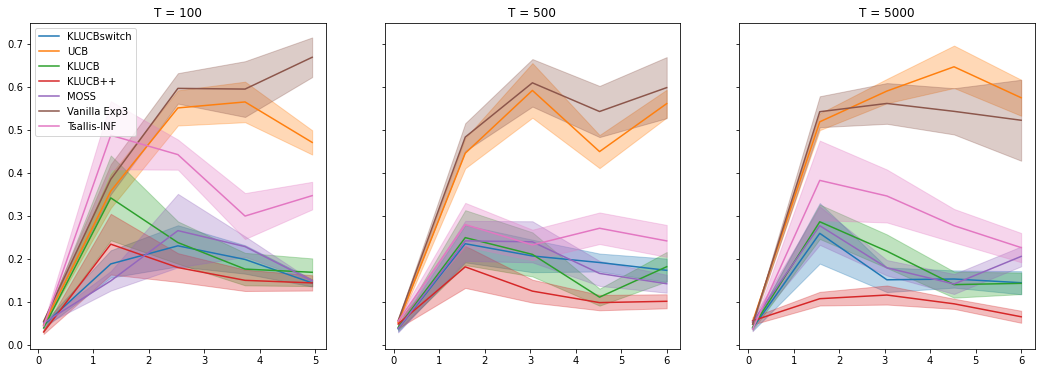

In [15]:
colors = plt.get_cmap("tab10").colors
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for k, T in enumerate(Ts):
    data_dict = result_minimax1[k]
    for j, alg in enumerate(alg_list):
        reg_to_plot = []
        var_to_plot = []
        for i, band in enumerate(band_list):
            mean_reg, var_reg = data_dict["results"][i][j]
            reg_to_plot.append(mean_reg[-1])
            sig = np.sqrt(var_reg / data_dict["N_tests"][i])
            var_to_plot.append(sig[-1])
        scaling = np.sqrt(K * T) 
        xs = all_xs_T[k]
        reg_to_plot = np.array(reg_to_plot)
        var_to_plot = np.array(var_to_plot)
        axs[k].set_title("T = {}".format(T))
        axs[k].plot(xs, reg_to_plot / scaling, color=colors[j], label=alg.label)
        axs[k].fill_between(xs, (reg_to_plot - var_to_plot) /  scaling, (reg_to_plot + var_to_plot) / scaling, color=colors[j], alpha=0.3)
axs[0].legend(loc='upper left')
plt.show()

# Minimax 2: K dependence

In [16]:
all_xs_K = []
Ks = np.linspace(0.1, 6, 5)
Ks = [2, 10, 50]
N_runs = 10
T = 2000
result_minimax2 = []
for K in Ks:
    xs = np.linspace(0.1, min(6, 0.7 * np.sqrt(T / K)), 5)
    all_xs_K.append(xs)
    band_list = [ bands.BernoulliBand(2, np.array([0.8] + [0.8 - x * np.sqrt(K / T)]*(K-1))) for x in xs]
    alg_list = [
            algs.KLUCBswitch(K, label="KLUCBswitch"),
            algs.UCB_a(K, label="UCB"),
            algs.KLUCB(K, label="KLUCB"),
            algs.KLUCBPlusPlus(K, label="KLUCB++"),
            algs.MOSS_a(K, sig=1/2, label="MOSS"),
            algs.Exp3(K, M=1, label="Exp3"),
            algs.FastFTRLTsallis(K, M=1, label="Tsallis-INF"),
           ]
    N_tests = [N_runs for _ in band_list]
    data_dict={
         'name':'Long Name',
         'short_name':'minimax_experiment2'+str(K),
         'T':T,
         'N_tests':N_tests,
         'band_list':band_list,
         'alg_list':alg_list,
         'results':None,
     }
    launch(data_dict, n_jobs=1, checkpoints=False)
    result_minimax2.append(data_dict)
    print("K = "+str(K)+" is done")

KLUCBswitch took 0.75 total, i.e., 0.07 per run
UCB took 0.50 total, i.e., 0.05 per run
KLUCB took 7.62 total, i.e., 0.76 per run
KLUCB++ took 4.84 total, i.e., 0.48 per run
MOSS took 0.65 total, i.e., 0.06 per run
Vanilla Exp3 took 2.44 total, i.e., 0.24 per run
Tsallis-INF took 8.59 total, i.e., 0.86 per run
KLUCBswitch took 0.76 total, i.e., 0.08 per run
UCB took 0.50 total, i.e., 0.05 per run
KLUCB took 7.38 total, i.e., 0.74 per run
KLUCB++ took 4.64 total, i.e., 0.46 per run
MOSS took 0.65 total, i.e., 0.06 per run
Vanilla Exp3 took 2.38 total, i.e., 0.24 per run
Tsallis-INF took 7.99 total, i.e., 0.80 per run
KLUCBswitch took 0.76 total, i.e., 0.08 per run
UCB took 0.50 total, i.e., 0.05 per run
KLUCB took 7.26 total, i.e., 0.73 per run
KLUCB++ took 3.98 total, i.e., 0.40 per run
MOSS took 0.65 total, i.e., 0.07 per run
Vanilla Exp3 took 2.42 total, i.e., 0.24 per run
Tsallis-INF took 7.73 total, i.e., 0.77 per run
KLUCBswitch took 0.75 total, i.e., 0.08 per run
UCB took 0.49 to

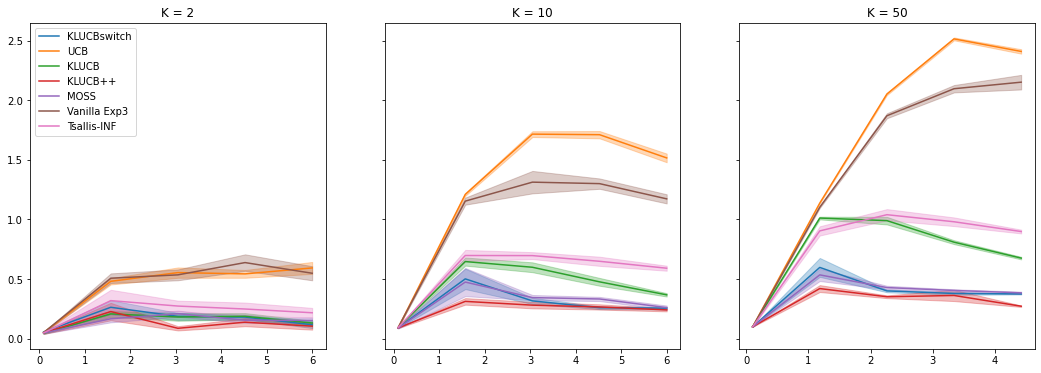

In [17]:
colors = plt.get_cmap("tab10").colors
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for k, K in enumerate(Ks):
    data_dict = result_minimax2[k]
    T = data_dict['T']
    for j, alg in enumerate(alg_list):
        reg_to_plot = []
        var_to_plot = []
        for i, band in enumerate(band_list):
            mean_reg, var_reg = data_dict["results"][i][j]
            reg_to_plot.append(mean_reg[-1])
            sig = np.sqrt(var_reg[-1] / data_dict["N_tests"][i])
            var_to_plot.append(sig)
        scaling = np.sqrt(K * T) 
        reg_to_plot = np.array(reg_to_plot)
        var_to_plot = np.array(var_to_plot)
        xs = all_xs_K[k]
        axs[k].set_title("K = {}".format(K))
        axs[k].plot(xs, reg_to_plot / scaling, color=colors[j], label=alg.label)
        axs[k].fill_between(xs, (reg_to_plot - var_to_plot) /  scaling, (reg_to_plot + var_to_plot) / scaling, color=colors[j], alpha=0.3)
axs[0].legend(loc='upper left')
plt.show()

# Switching Profile

## Case I: large gap
Arm 1 is the best arm.

In [35]:
T = 5000
N = 100
K = 3
mus_ber = np.array([0.9]+ [0.3]*(K-1))
bandit = bands.BernoulliBand(2, mus_ber)

results_large_gap = np.zeros((N, T-K, K))
for i in range(N):
    alg = algs.KLUCBswitchProfile(K, label="KLUCBswitch")
    alg.play_T_times(bandit, T)
    for a in range(K):
        results_large_gap[i, :, a] = alg.profile[a]

print('Done')

Done


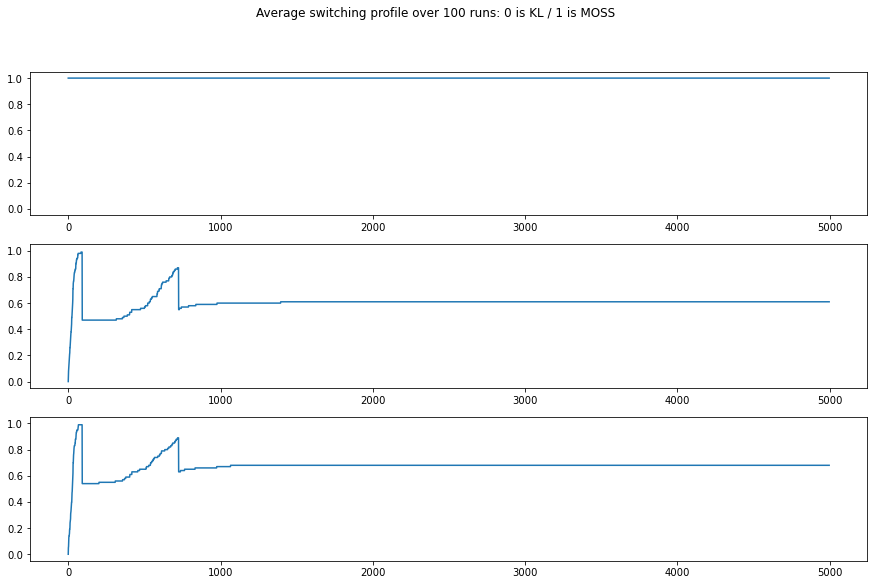

In [36]:
fig, axs = plt.subplots(K, 1, figsize=(15, 3*K), sharey=True)
for a in range(K):
    axs[a].plot(np.mean(results_large_gap[:, :, a], axis=0))
fig.suptitle('Average switching profile over 100 runs: 0 is KL / 1 is MOSS')
plt.show()

## Case II: small gap
Arm 1 is the best arm. Both arms are always in MOSS mode.

In [37]:
T = 5000
N = 100
K = 3
mus_ber = np.array([0.9]+ [0.8]*(K-1))
bandit = bands.BernoulliBand(2, mus_ber)

results_small_gap = np.zeros((N, T-K, K))
for i in range(N):
    alg = algs.KLUCBswitchProfile(K, label="KLUCBswitch")
    alg.play_T_times(bandit, T)
    for a in range(K):
        results_small_gap[i, :, a] = alg.profile[a]

print('Done')

Done


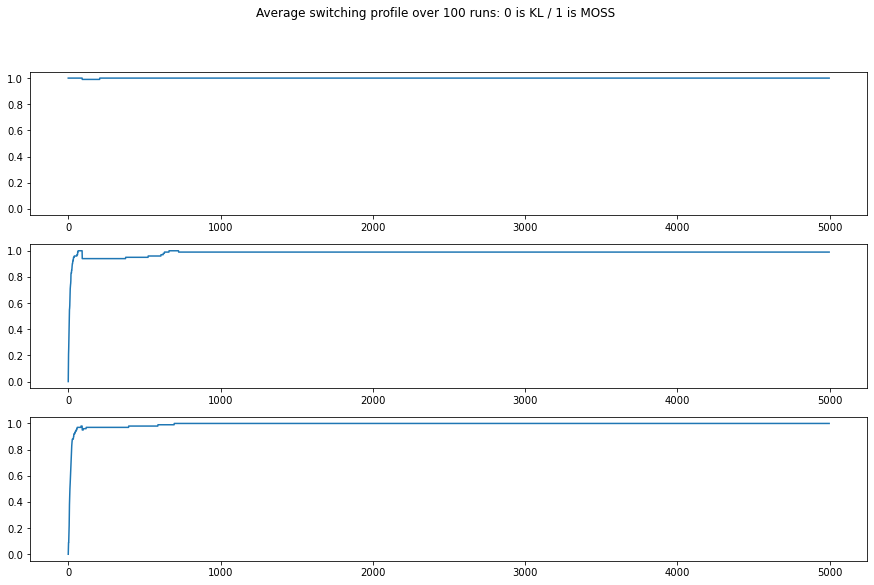

In [38]:
fig, axs = plt.subplots(K, 1, figsize=(15, 3*K), sharey=True)
for a in range(K):
    axs[a].plot(np.mean(results_small_gap[:, :, a], axis=0))
fig.suptitle('Average switching profile over 100 runs: 0 is KL / 1 is MOSS')
plt.show()

# Testing Tsallis-INF

In [23]:
#K = 2
#tsallis = algs.FastFTRLTsallis(K, M=1, label="Tsallis-INF")
#tsallis.verb = True
#
#bandit = bands.TruncatedGaussian(K_gauss, mus_gauss, sig_gauss)
#
#T = 1000
#
#for t in range(T):
#    tsallis.play_once(bandit)
#    print(t)